<a href="https://colab.research.google.com/github/Seenuprime/Customer-Segmentation/blob/main/Notebooks/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r'feature_extracted.csv')
df

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR)
0,0,3584,-0.115192,-0.235543
1,1,3646,-0.133570,4.018820
2,0,5265,-0.115126,-0.169539
3,0,5265,0.887944,0.073946
4,0,5654,-0.128317,0.028701
...,...,...,...,...
1047311,1,5789,-0.127229,-0.117831
1047312,1,5626,-0.103972,-0.169387
1047313,1,3392,0.125861,-0.122241
1047314,1,9133,-0.124295,-0.087262


In [4]:
df['CustLocation'].value_counts()

CustLocation
5265    102815
5789     84920
772      81533
3081     73818
2073     71019
         ...  
7319         1
2327         1
2152         1
3904         1
3429         1
Name: count, Length: 9351, dtype: int64

In [5]:
len(df['CustLocation'])

1047316

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

In [7]:
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [8]:
df['Cluster'] = kmeans.predict(df)

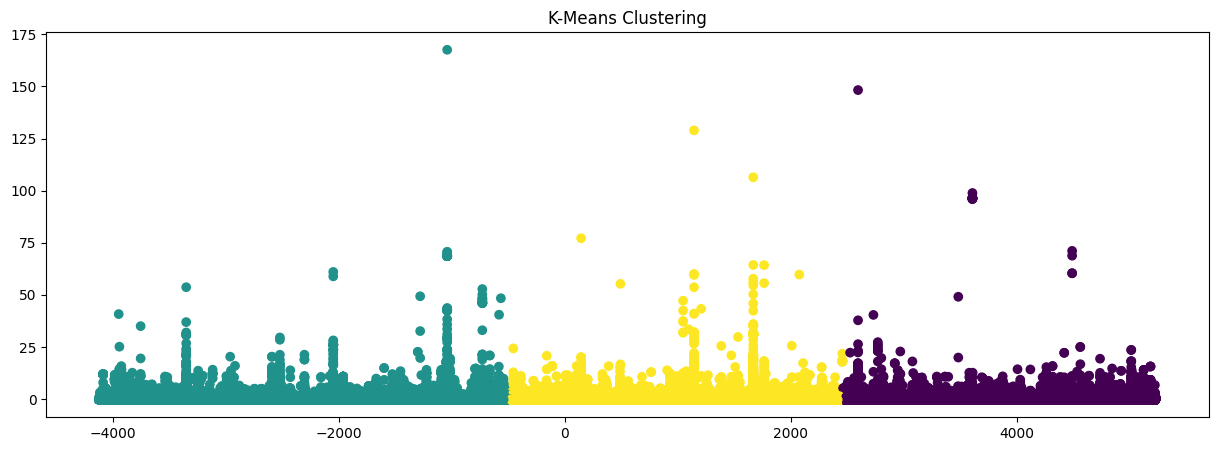

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df.iloc[:, :-1])

plt.figure(figsize=(10, 5))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')

plt.show()

In [12]:
pca_features

array([[-5.37642251e+02, -2.45780579e-01],
       [-4.75642241e+02,  2.74830346e+00],
       [ 1.14335775e+03, -2.03014235e-01],
       ...,
       [-7.29642246e+02,  3.90442358e-03],
       [ 5.01135775e+03, -1.61740331e-01],
       [ 2.59435775e+03, -8.33625890e-02]])

In [13]:
df

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Cluster
0,0,3584,-0.115192,-0.235543,1
1,1,3646,-0.133570,4.018820,2
2,0,5265,-0.115126,-0.169539,2
3,0,5265,0.887944,0.073946,2
4,0,5654,-0.128317,0.028701,2
...,...,...,...,...,...
1047311,1,5789,-0.127229,-0.117831,2
1047312,1,5626,-0.103972,-0.169387,2
1047313,1,3392,0.125861,-0.122241,1
1047314,1,9133,-0.124295,-0.087262,0


In [16]:
import numpy as np
pred_data = np.array([0, 3584,	-0.115192,	-0.235543])
pred = kmeans.predict([pred_data])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [17]:
pred

array([1], dtype=int32)

In [20]:
import joblib
joblib.dump(kmeans, 'Customer_seg_model.pkl')

['Customer_seg_model.pkl']

In [21]:
loaded_model = joblib.load('Customer_seg_model.pkl')
loaded_model.predict([[0, 3584,	-0.115192,	-0.235543]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)